## Top Crimes Hourly Bar Plots

This file takes some of the top crimes most relevant to LA resident safety: 
1. Vehicle related crimes
2. Theft related crimes
3. Children related crimes
4. Sexual offense related crimes

The heat maps for said crimes are referenced to determine the top regions to analyze further.
The crime count is taken from the dataframe to identify the most influential area within the top regions. 
To identify the times a crime is most likely to happen, bar hourly plots are created for each crime to be analyzed.

In [173]:
# import libraries and read data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from arcgis.gis import *
from ast import literal_eval

#read data file
df = pd.read_csv('../Crime_Data_from_2010_to_Present.csv')

In [174]:
# Grouping crimes together

important_crime_types = ['ASSAULT','HOMICIDE','WEAPONS','SEXUAL OFFENSE',
                         'CRIMES AGAINST CHILDREN','THEFT','VEHICLE']

Assault = ['INTIMATE PARTNER - SIMPLE ASSAULT','BATTERY - SIMPLE ASSAULT',
           'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
           'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 'OTHER ASSAULT',
           'INTIMATE PARTNER - AGGRAVATED ASSAULT', 
           'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
           'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER','BATTERY POLICE (SIMPLE)',
           'BATTERY ON A FIREFIGHTER']

Homicide = ['CRIMINAL HOMICIDE','LYNCHING - ATTEMPTED','LYNCHING',
            'MANSLAUGHTER', 'NEGLIGENT']

Weapons = ['BOMB SCARE','SHOTS FIRED AT INHABITED DWELLING',
           'BRANDISH WEAPON','ARSON','DISCHARGE FIREARMS/SHOTS FIRED',
           'WEAPONS POSSESSION/BOMBING',
           'REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)0132',
           'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT',
           'FIREARMS RESTRAINING ORDER (FIREARMS RO)']

Sexual_Offense = ['SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH 0007=02',
                  'INDECENT EXPOSURE','RAPE, FORCIBLE',
                  'BATTERY WITH SEXUAL CONTACT',
                  'SEXUAL PENTRATION WITH A FOREIGN OBJECT','LETTERS, LEWD',
                  'RAPE, ATTEMPTED','LEWD CONDUCT','PIMPING','SEX, UNLAWFUL',
                  'ORAL COPULATION','PANDERING',
                  'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)']

Crimes_against_Children = ['CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
                           'CHILD NEGLECT (SEE 300 W.I.C.)',
                           'CHILD ANNOYING (17YRS & UNDER)',
                           'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)0060',
                           'CHILD STEALING','CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
                           'CHILD ABANDONMENT','DRUGS, TO A MINOR']

Theft = ['THEFT PLAIN - PETTY ($950 & UNDER)',
         'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
         'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)',
         'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036',
         'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER',
         'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)',
         'THEFT, PERSON','THEFT PLAIN - ATTEMPT',
         'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)','THEFT OF IDENTITY',
         'BUNCO, GRAND THEFT','BUNCO, PETTY THEFT','THEFT FROM PERSON - ATTEMPT',
         'DISHONEST EMPLOYEE - PETTY THEFT','THEFT FROM MOTOR VEHICLE - ATTEMPT',
         'DISHONEST EMPLOYEE - GRAND THEFT',
         'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $400',
         'GRAND THEFT / INSURANCE FRAUD',
         'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
         'GRAND THEFT / AUTO REPAIR','PETTY THEFT - AUTO REPAIR',
         'TILL TAP - GRAND THEFT ($950.01 & OVER)','THEFT, COIN MACHINE - ATTEMPT']

Vehicle = ['VEHICLE - ATTEMPT STOLEN',
           'VEHICLE - STOLEN', 
           'BURGLARY FROM VEHICLE', 
           'THEFT FROM MOTOR VEHICLE - ATTEMPT', 
           'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)', 
           'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)', 
           'THROWING OBJECT AT MOVING VEHICLE',
           'BURGLARY FROM VEHICLE, ATTEMPTED']

Other = Assault + Homicide + Crimes_against_Children

In [175]:
# reset coulmn names to all lower cases
df1.columns = ['DR_Number','date_reported','date_occurred','time_occurred','area_ID','area_name','reporting_district','crime_code','crime_code_description','MO_code','victim_age','victim_sex','victim_descent',	'premise_code',	'premise_description','weapon_used_code','weapon_description','status_code','status_description','crime_code1','crime_code2','crime_code3','crime_code4','address','cross_street','location']

In [176]:
# get time_occurred into 0-23hr format
df1.time_occurred = df1.time_occurred/100
df1['time_occurred']= df1['time_occurred'].astype(int)

In [177]:
# Assigning a single label for each group of crimes

#df2.loc[(df2.crime_code_description.isin(Other)),'crime_code_description'] = 'OTHER'
df1.loc[(df1.crime_code_description.isin(Assault)),'crime_code_description'] = 'ASSAULT'
df1.loc[(df1.crime_code_description.isin(Homicide)),'crime_code_description'] = 'HOMICIDE'
df1.loc[(df1.crime_code_description.isin(Crimes_against_Children)),'crime_code_description'] = 'CHILDREN'
df1.loc[(df1.crime_code_description.isin(Weapons)),'crime_code_description'] = 'WEAPONS'
df1.loc[(df1.crime_code_description.isin(Sexual_Offense)),'crime_code_description'] = 'SEXUAL OFFENSE'
df1.loc[(df1.crime_code_description.isin(Theft)),'crime_code_description'] = 'THEFT'
df1.loc[(df1.crime_code_description.isin(Vehicle)),'crime_code_description'] = 'VEHICLE'

In [178]:
# dataframes for each big category of crimes, and important crimes

df_important = df1[df1['crime_code_description'].isin(important_crime_types)]
df_OTHER = df1[(df1['crime_code_description'] == 'ASSAULT') | (df1['crime_code_description'] == 'HOMICIDE') |
                  (df1['crime_code_description'] == 'CHILDREN')]
df_ASSAULT = df1[df1['crime_code_description'] == 'ASSAULT']
df_HOMICIDE = df1[df1['crime_code_description'] == 'HOMICIDE']
df_CHILDREN = df1[df1['crime_code_description'] == 'CHILDREN']
df_WEAPONS = df1[df1['crime_code_description'] == 'WEAPONS']
df_SEXUAL = df1[df1['crime_code_description'] == 'SEXUAL OFFENSE']
df_THEFT = df1[df1['crime_code_description'] == 'THEFT']
df_VEHICLE = df1[df1['crime_code_description'] == 'VEHICLE']

In [179]:
# dataframes for each big category of crimes, and important crimes, in 2016 and 2017

df_important_16_17 = df_important[(df_important.date_occurred.str.endswith('16')) | (df_important.date_occurred.str.endswith('17'))]
df_OTHER_16_17 = df_OTHER[(df_OTHER.date_occurred.str.endswith('16')) | (df_OTHER.date_occurred.str.endswith('17'))]
df_ASSAULT_16_17 = df_ASSAULT[(df_ASSAULT.date_occurred.str.endswith('16')) | (df_ASSAULT.date_occurred.str.endswith('17'))]
df_HOMICIDE_16_17 = df_HOMICIDE[(df_HOMICIDE.date_occurred.str.endswith('16')) | (df_HOMICIDE.date_occurred.str.endswith('17'))]
df_CHILDREN_16_17 = df_CHILDREN[(df_CHILDREN.date_occurred.str.endswith('16')) | (df_CHILDREN.date_occurred.str.endswith('17'))]
df_WEAPONS_16_17 = df_WEAPONS[(df_WEAPONS.date_occurred.str.endswith('16')) | (df_WEAPONS.date_occurred.str.endswith('17'))]
df_SEXUAL_16_17 = df_SEXUAL[(df_SEXUAL.date_occurred.str.endswith('16')) | (df_SEXUAL.date_occurred.str.endswith('17'))]
df_THEFT_16_17 = df_THEFT[(df_THEFT.date_occurred.str.endswith('16')) | (df_THEFT.date_occurred.str.endswith('17'))]
df_VEHICLE_16_17 = df_VEHICLE[(df_VEHICLE.date_occurred.str.endswith('16')) | (df_VEHICLE.date_occurred.str.endswith('17'))]

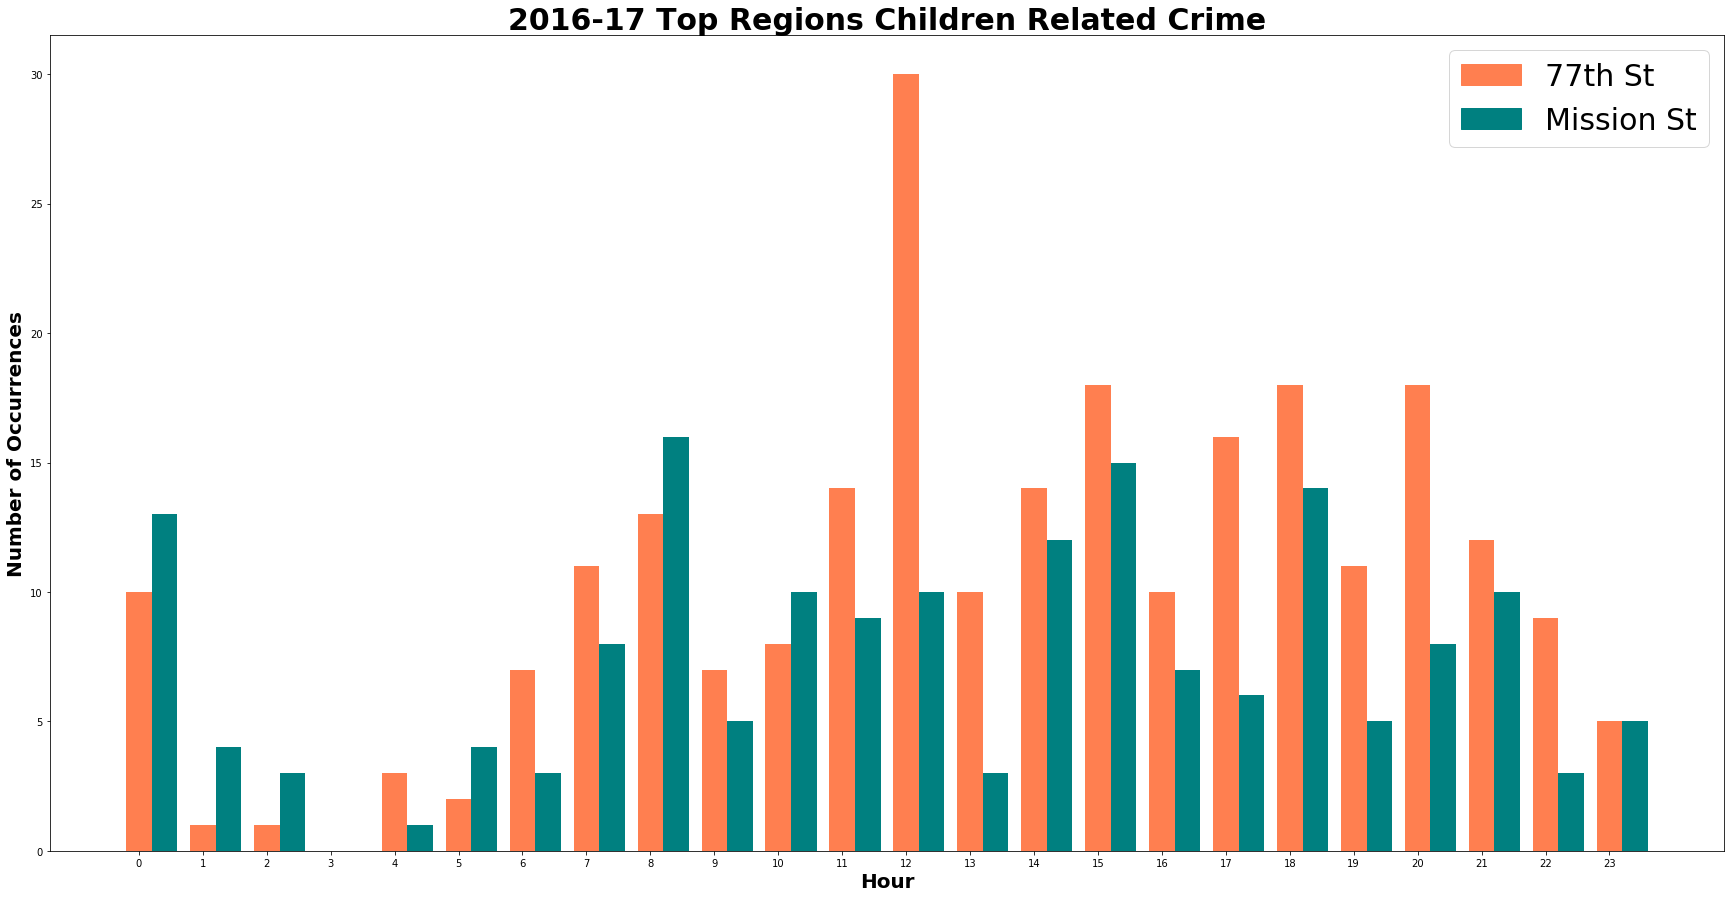

In [180]:
'''2016-17 Top Regions hourly Children Related Crime'''

#filter dataframe to top two regions with highest CHILDREN related crime: 77th Street, and Mission'
top_CHILDREN_16_17 = df_CHILDREN_16_17[(df_CHILDREN_16_17['area_name'] == '77th Street') | (df_CHILDREN_16_17['area_name'] == 'Mission')]

# group by top two regions
hr_CHILDREN_16_17 = top_CHILDREN_16_17.groupby(['area_name', 'time_occurred'])
summ_hr_CHILDREN_16_17 = hr_CHILDREN_16_17.size()

#print(summ_hr_CHILDREN_16_17)
seven7thSt_count = [10,1,1,0,3,2,7,11,13,7,8,14,30,10,14,18,10,16,18,11,18,12,9,5]
missionSt_count = [13,4,3,0,1,4,3,8,16,5,10,9,10,3,12,15,7,6,14,5,8,10,3,5]
hrs = np.arange(len(seven7thSt_count))

assert len(seven7thSt_count) == 24,"Count not exactly for 24hrs"
assert len(missionSt_count) == 24, "Count not exactly for 24hrs"

#setup plot
bar_width=0.40
plt.figure(figsize=(30,15))
plt.bar(hrs,seven7thSt_count, color='coral', width= bar_width,zorder=2)
plt.bar(hrs + bar_width, missionSt_count, color='teal',width= bar_width,zorder=2)

#labels
plt.xticks(hrs, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.xlabel('Hour', weight='bold', size=20)
plt.ylabel('Number of Occurrences', weight='bold', size=20)
plt.title('2016-17 Top Regions Children Related Crime', weight='bold', size=30)

#legend
coral_bar = mpatches.Patch(color='coral', label='77th St')
gold_bar = mpatches.Patch(color='teal', label='Mission St')
plt.legend(handles=[coral_bar, gold_bar], prop={'size':30})
plt.show()

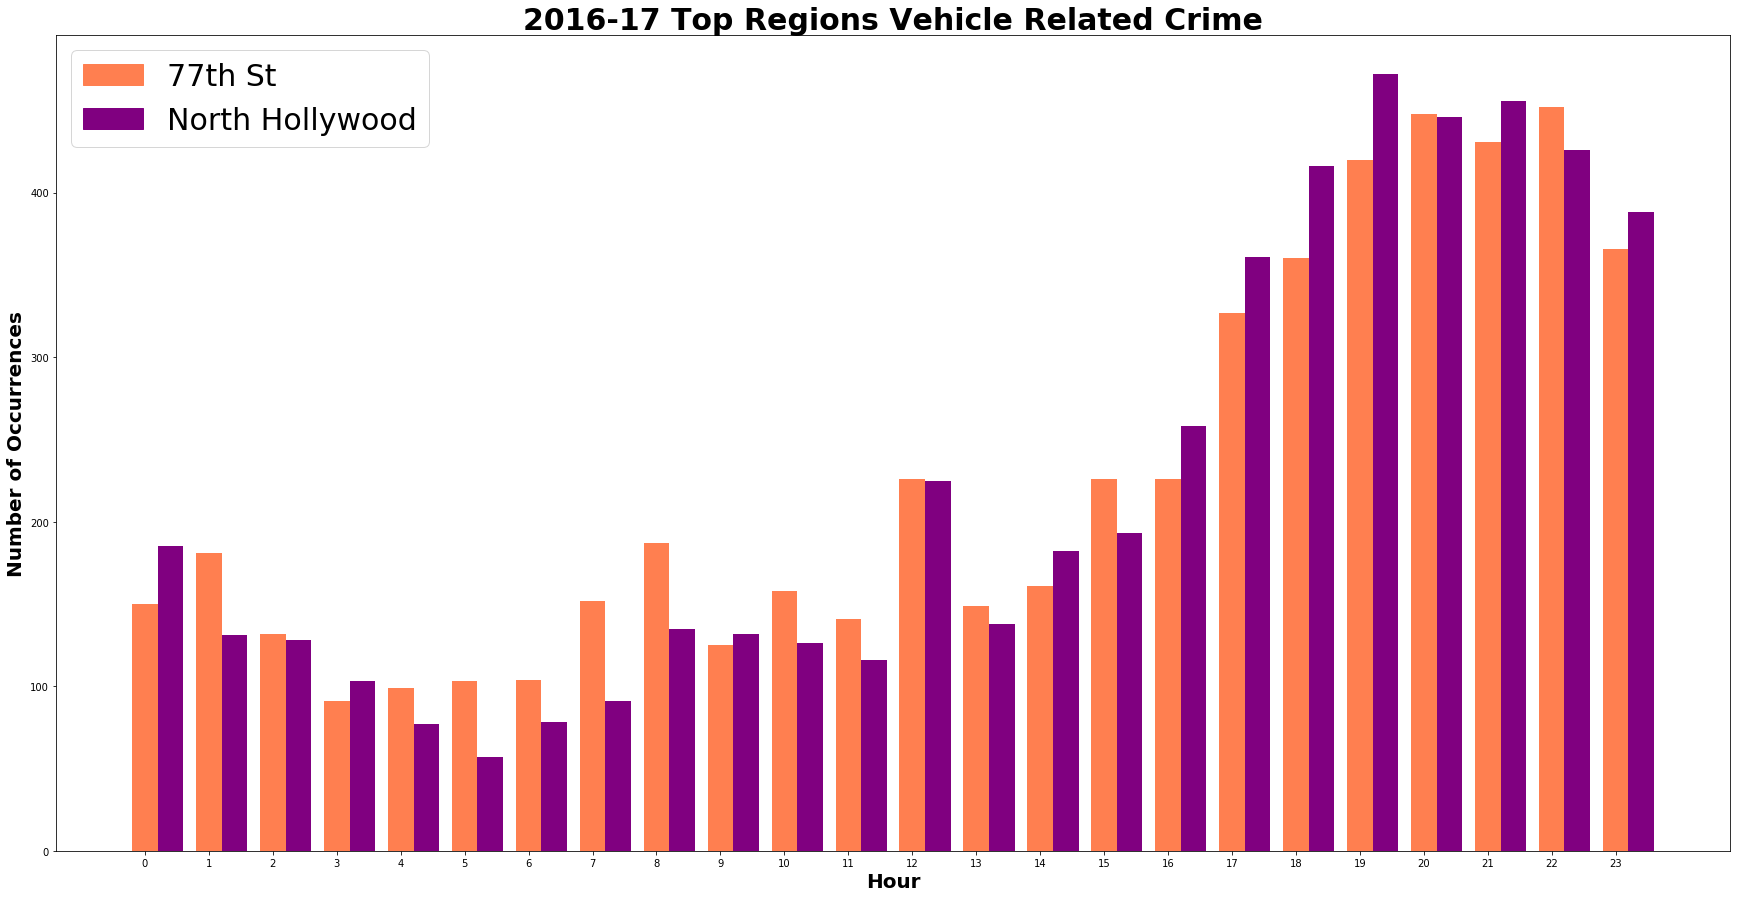

In [182]:
'''2016-17 Top Regions hourly VEHICLE Related Crime'''

#filter dataframe to top two regions with highest VEHICLE related crime: 77th Street, and N Hollywood
top_VEHICLE_16_17 = df_VEHICLE_16_17[(df_VEHICLE_16_17['area_name'] == '77th Street') | (df_VEHICLE_16_17['area_name'] == 'N Hollywood')]

# group by top two regions
hr_VEHICLE_16_17 = top_VEHICLE_16_17.groupby(['area_name', 'time_occurred'])
summ_hr_VEHICLE_16_17 = hr_VEHICLE_16_17.size()
#print(summ_hr_VEHICLE_16_17)

seven7thSt_count = [150,181,132,91,99,103,104,152,187,125,158,141,226,149,161,226,226,327,360,420,448,431,452,366]
nHollywood_count = [185,131,128,103,77,57,78,91,135,132,126,116,225,138,182,193,258,361,416,472,446,456,426,388]
hrs = np.arange(len(seven7thSt_count))

assert len(seven7thSt_count) == 24,"Count not exactly for 24hrs"
assert len(nHollywood_count) == 24, "Count not exactly for 24hrs"

#setup plot
bar_width=0.40
plt.figure(figsize=(30,15))
plt.bar(hrs,seven7thSt_count, color='coral', width= bar_width,zorder=2)
plt.bar(hrs + bar_width, nHollywood_count, color='purple',width= bar_width,zorder=2)

#labels
plt.xticks(hrs, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.xlabel('Hour', weight='bold', size=20)
plt.ylabel('Number of Occurrences', weight='bold', size=20)
plt.title('2016-17 Top Regions Vehicle Related Crime', weight='bold', size=30)

#legend
coral_bar = mpatches.Patch(color='coral', label='77th St')
gold_bar = mpatches.Patch(color='purple', label='North Hollywood')
plt.legend(handles=[coral_bar, gold_bar], prop={'size':30})
plt.show()

In [ ]:
'''2016-17 Top Regions hourly THEFT Related Crime'''

#filter dataframe to top two regions with highest VEHICLE related crime: Topanga, and Pacific
top_THEFT_16_17 = df_THEFT_16_17[(df_THEFT_16_17['area_name'] == 'Topanga') | (df_THEFT_16_17['area_name'] == 'Pacific')]


# group by top two regions
hr_VEHICLE_16_17 = top_VEHICLE_16_17.groupby(['area_name', 'time_occurred'])
summ_hr_VEHICLE_16_17 = hr_VEHICLE_16_17.size()
#print(summ_hr_VEHICLE_16_17)

topanga_count = [224,96,76,40,45,59,102,159,279,238,324,231,658,284,345,329,342,355,283,269,259,219,178,174]
pacific_count = [183,75,55,43,56,45,76,92,286,201,267,300,929,366,346,433,410,422,412,343,306,222,143,103]
hrs = np.arange(len(topanga_count))

assert len(topanga_count) == 24,"Count not exactly for 24hrs"
assert len(pacific_count) == 24, "Count not exactly for 24hrs"

#setup plot
bar_width=0.40
plt.figure(figsize=(30,15))
plt.bar(hrs,topanga_count, color='sienna', width= bar_width,zorder=2)
plt.bar(hrs + bar_width, pacific_count, color='grey',width= bar_width,zorder=2)

#labels
plt.xticks(hrs, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.xlabel('Hour', weight='bold', size=20)
plt.ylabel('Number of Occurrences', weight='bold', size=20)
plt.title('2016-17 Top Regions Theft Related Crime', weight='bold', size=30)

#legend
coral_bar = mpatches.Patch(color='sienna', label='Topanga')
gold_bar = mpatches.Patch(color='grey', label='Pacific')
plt.legend(handles=[coral_bar, gold_bar], prop={'size':30})
plt.show()

In [ ]:
'''2016-17 Top Region hourly  & victim sex comparison SEXUAL OFFENSE Related Crime'''

#filter dataframe to top two regions with highest VEHICLE related crime: Topanga, and Pacific



# group by top two regions
hr_VEHICLE_16_17 = top_VEHICLE_16_17.groupby(['area_name', 'time_occurred'])
summ_hr_VEHICLE_16_17 = hr_VEHICLE_16_17.size()
#print(summ_hr_VEHICLE_16_17)

female_count = [527,356,400,231,178,134,149,224,393,289,347,307,819,343,382,454,388,385,349,332,399,369,393,403]
male_count = [80,39,39,38,19,26,33,50,85,67,80,74,210,64,95,106,66,70,79,73,77,68,48,83]
other_count = [1,1,0,1,0,0,1,4,1,2,5,2,4,3,1,2,1,2,2,2,2,4,0,2]

assert len(female_count) == 24,"Female victim count not exactly for 24hrs"
assert len(male_count) == 24, "Male victim count not exactly for 24hrs"
assert len(other_count) == 24, "Other victim count not exactly for 24hrs"

hrs = np.arange(len(female_count))

#setup plot
bar_width=0.40
plt.figure(figsize=(30,15))
plt.bar(hrs,female_count, color='salmon', width= bar_width,zorder=2)
plt.bar(hrs + bar_width, male_count, color='turquoise',width= bar_width,zorder=2)
plt.bar(hrs + bar_width, other_count, color='purple',width= bar_width,zorder=2)

#labels
plt.xticks(hrs, ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])
plt.xlabel('Hour', weight='bold', size=20)
plt.ylabel('Number of Occurrences', weight='bold', size=20)
plt.title('2016-17 77th Street Hourly Sexual Offense Crime', weight='bold', size=30)

#legend
coral_bar = mpatches.Patch(color='salmon', label='Female victim')
gold_bar = mpatches.Patch(color='turquoise', label='Male victim')
other_bar = mpatches.Patch(color='purple', label='Other-sex victim')
plt.legend(handles=[coral_bar, gold_bar, other_bar], prop={'size':30})
plt.show()